# **IMPORTANDO BIBLIOTECAS**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# **LEITURA E VISUALIZAÇÃO DOS DADOS**

In [2]:
combustiveis_brasil = pd.read_excel('dados/semanal.xlsx')
combustiveis_brasil

,DATA INICIAL,DATA FINAL,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2012-12-30,2013-01-05,ETANOL HIDRATADO,8173,R$/l,1.948,0.244,1.479,3.000,0.262,0.125,1.686,0.219,1.2995,2.3632,0.13
1,2012-12-30,2013-01-05,GASOLINA COMUM,8672,R$/l,2.758,0.147,2.269,3.799,0.385,0.053,2.373,0.11,2.12,2.89,0.046
2,2012-12-30,2013-01-05,GLP,8052,R$/13Kg,40.113,4.017,26.000,62.000,10.362,0.100,29.751,4.514,16.14,45,0.152
3,2012-12-30,2013-01-05,GNV,499,R$/m3,1.757,0.176,1.399,2.599,0.431,0.100,1.326,0.146,0.8354,1.8217,0.11
4,2012-12-30,2013-01-05,OLEO DIESEL,6813,R$/l,2.153,0.114,1.869,2.950,0.226,0.053,1.927,0.082,1.7275,2.57,0.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,2022-09-11,2022-09-17,GASOLINA COMUM,4874,R$/l,4.970,0.342,4.170,6.990,-,0.069,-,-,-,-,-
3084,2022-09-11,2022-09-17,GLP,3528,R$/13kg,113.250,10.047,84.990,160.000,-,0.089,-,-,-,-,-
3085,2022-09-11,2022-09-17,GNV,337,R$/m³,5.010,0.566,3.180,6.990,-,0.113,-,-,-,-,-
3086,2022-09-11,2022-09-17,OLEO DIESEL,2273,R$/l,6.840,0.324,6.220,8.810,-,0.047,-,-,-,-,-


# **ORGANIZAÇÃO E TRATAMENTO DOS DADOS**

In [3]:
combustiveis_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DATA INICIAL                   3088 non-null   datetime64[ns]
 1   DATA FINAL                     3088 non-null   datetime64[ns]
 2   PRODUTO                        3088 non-null   object        
 3   NÚMERO DE POSTOS PESQUISADOS   3088 non-null   int64         
 4   UNIDADE DE MEDIDA              3088 non-null   object        
 5   PREÇO MÉDIO REVENDA            3088 non-null   float64       
 6   DESVIO PADRÃO REVENDA          3088 non-null   float64       
 7   PREÇO MÍNIMO REVENDA           3088 non-null   float64       
 8   PREÇO MÁXIMO REVENDA           3088 non-null   float64       
 9   MARGEM MÉDIA REVENDA           3088 non-null   object        
 10  COEF DE VARIAÇÃO REVENDA       3088 non-null   float64       
 11  PREÇO MÉDIO DISTR

## Exclusão das colunas desnecessárias

In [4]:
# Colunas de número de postos pesquisados e de preços de distribuição
combustiveis_brasil.drop(combustiveis_brasil.columns[9:16], axis=1, inplace=True)
combustiveis_brasil.drop(combustiveis_brasil.columns[3:5], axis=1, inplace=True)
combustiveis_brasil.drop(combustiveis_brasil.columns[[1]], axis=1, inplace=True)
combustiveis_brasil

,DATA INICIAL,PRODUTO,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA
0,2012-12-30,ETANOL HIDRATADO,1.948,0.244,1.479,3.000
1,2012-12-30,GASOLINA COMUM,2.758,0.147,2.269,3.799
2,2012-12-30,GLP,40.113,4.017,26.000,62.000
3,2012-12-30,GNV,1.757,0.176,1.399,2.599
4,2012-12-30,OLEO DIESEL,2.153,0.114,1.869,2.950
...,...,...,...,...,...,...
3083,2022-09-11,GASOLINA COMUM,4.970,0.342,4.170,6.990
3084,2022-09-11,GLP,113.250,10.047,84.990,160.000
3085,2022-09-11,GNV,5.010,0.566,3.180,6.990
3086,2022-09-11,OLEO DIESEL,6.840,0.324,6.220,8.810


## Renomeação das colunas

In [5]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [6]:
import re
from unidecode import unidecode

In [7]:
# Por boas práticas e para evitar futuros problemas, nomes de colunas não devem ter
# letras maiúsculas e nem caracteres especiais.

def renomeia_colunas(nome_coluna):
    """Retira os acentos, substitui os espaços em branco por underline e 
    deixa todas as letras minúsculas"""
    return unidecode(nome_coluna).replace(' ','_').lower()

In [8]:
# Renomeia as colunas de forma padronizada
combustiveis_brasil.columns = [renomeia_colunas(coluna) for coluna in combustiveis_brasil.columns]

# Renomeia a coluna das datas
combustiveis_brasil.rename(columns={'data_inicial': 'data'}, inplace=True)

## Exclusão dos registros dos outros combustíveis

In [9]:
# Remove todos os registros dos outros combustíveis utilizando os índices
gasolina_brasil = combustiveis_brasil.drop(combustiveis_brasil.index[combustiveis_brasil.loc[
    combustiveis_brasil.produto != 'GASOLINA COMUM'].index]).sort_values(by='data').reset_index(drop=True)

gasolina_brasil

,data,produto,preco_medio_revenda,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda
0,2012-12-30,GASOLINA COMUM,2.758,0.147,2.269,3.799
1,2013-01-06,GASOLINA COMUM,2.764,0.146,2.269,3.799
2,2013-01-13,GASOLINA COMUM,2.758,0.148,2.269,3.799
3,2013-01-20,GASOLINA COMUM,2.763,0.146,2.269,3.799
4,2013-01-27,GASOLINA COMUM,2.772,0.150,2.229,3.899
...,...,...,...,...,...,...
493,2022-08-14,GASOLINA COMUM,5.400,0.327,4.500,8.750
494,2022-08-21,GASOLINA COMUM,5.250,0.328,4.190,7.000
495,2022-08-28,GASOLINA COMUM,5.170,0.335,4.130,7.000
496,2022-09-04,GASOLINA COMUM,5.030,0.352,4.350,7.090


## Valores missing (NaN)

In [10]:
combustiveis_brasil.isnull().sum()

data                     0
produto                  0
preco_medio_revenda      0
desvio_padrao_revenda    0
preco_minimo_revenda     0
preco_maximo_revenda     0
dtype: int64

## Tipagem dos dados

In [11]:
combustiveis_brasil.dtypes

data                     datetime64[ns]
produto                          object
preco_medio_revenda             float64
desvio_padrao_revenda           float64
preco_minimo_revenda            float64
preco_maximo_revenda            float64
dtype: object

# **ANÁLISES ESTATÍSTICAS**

In [12]:
gasolina_brasil.describe()

,preco_medio_revenda,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda
count,498.000000,498.000000,498.000000,498.000000
mean,4.131655,0.257275,3.423285,5.376088
std,1.121643,0.073923,0.926271,1.240785
min,2.758000,0.145000,2.100000,3.699000
25%,3.299250,0.195000,2.749000,4.519000
50%,3.875000,0.262000,3.179000,4.999000
75%,4.512500,0.306000,3.699000,5.859000
max,7.390000,0.535000,6.290000,8.999000


## Análise de outliers

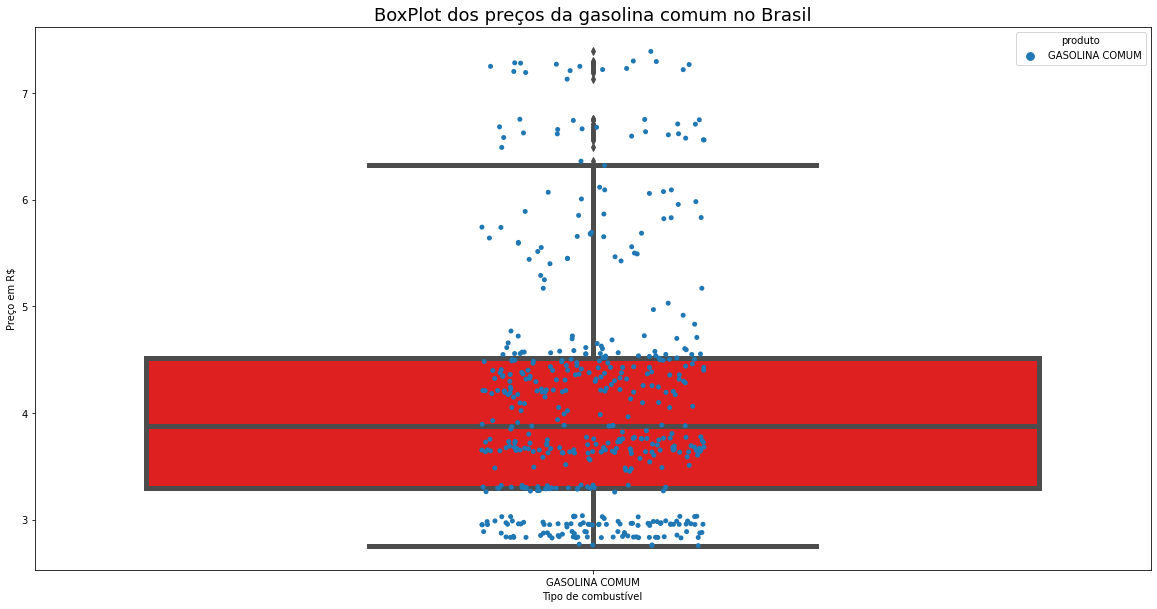

In [13]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(20, 10))

# BoxPlot dos combustíveis em relação aos seus preços
boxplot = sns.boxplot( x="produto", y ="preco_medio_revenda",data=gasolina_brasil, linewidth=5, color='r')

# Gráfico de disperção
dispersao = sns.stripplot(x="produto", y ="preco_medio_revenda", hue="produto", data=gasolina_brasil)

# Adicionando Título ao gráfico
plt.title("BoxPlot dos preços da gasolina comum no Brasil", loc="center", fontsize=18)
plt.xlabel("Tipo de combustível")
plt.ylabel("Preço em R$")

plt.show()

--> Apesar de existirem diversos dados acima do limite máximo (outliers), não os removerei pois são preços reais e não dados incorretos ou que se afastam muito da normalidade.

# **Exploração**

### Preços médios de revenda

In [14]:
# Atribui o mês e os preços em variáveis para facilitar na utilização

datas = combustiveis_brasil.data.unique()
datas.sort()

precos_gasolina = gasolina_brasil.preco_medio_revenda

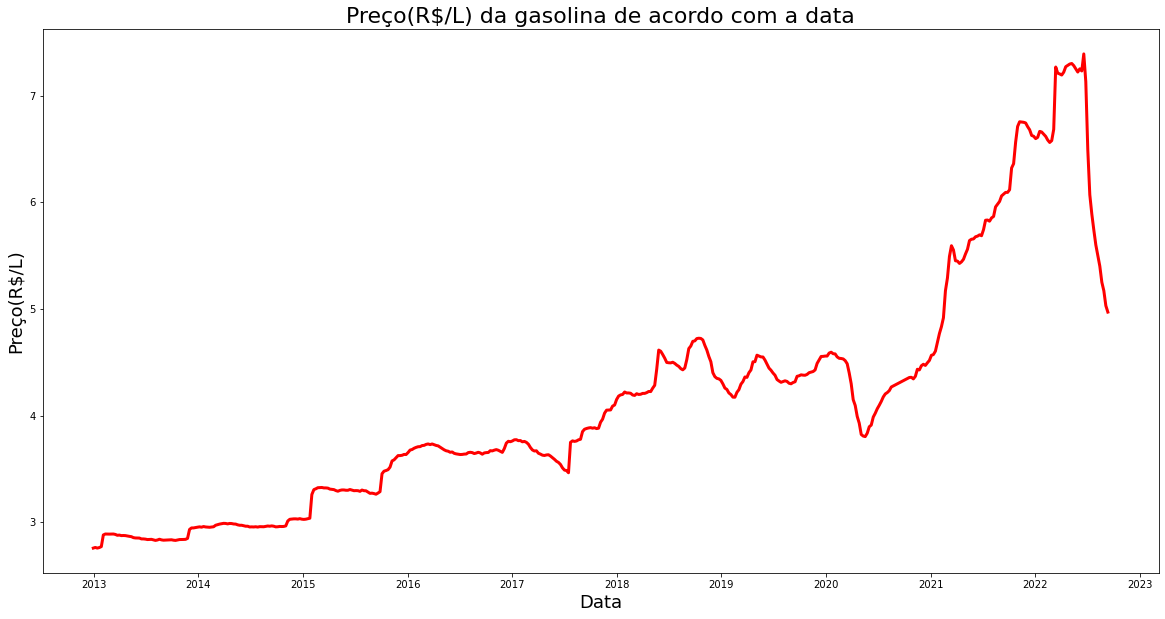

In [15]:
plt.subplots(figsize=(20,10))

plt.plot(datas, precos_gasolina, c='r', lw=3, label='Gasolina Comum')

plt.title('Preço(R$/L) da gasolina de acordo com a data', fontsize=22)
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço(R$/L)', fontsize=18)
plt.show()

### Aumento no preço médio de revenda de acordo com a data

In [16]:
# Calcula o aumento no preço médio de revenda da gasolina por semana;
# Aumento = preço no dia atual - preço no dia anterior

aumento_gasolina = list(map(lambda x: 0 if (x == 0) else precos_gasolina[x] - precos_gasolina[x-1], 
                          np.arange(len(datas))))

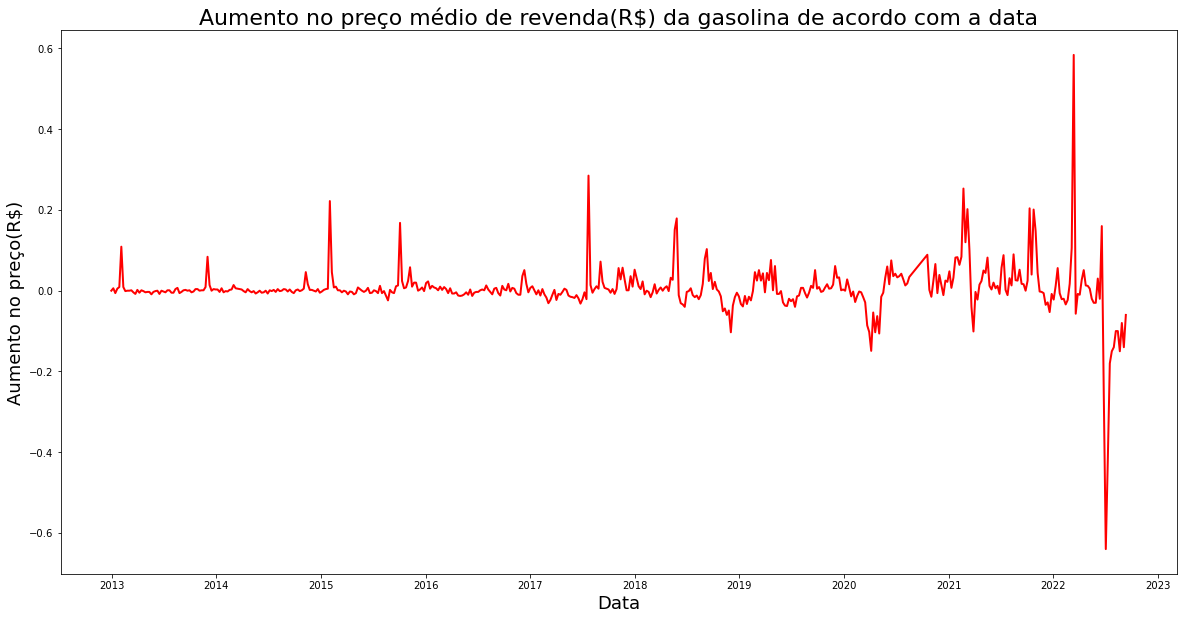

In [17]:
plt.subplots(figsize=(20,10))

plt.plot(datas, aumento_gasolina, c='r', lw=2, label='Gasolina Comum')

plt.title('Aumento no preço médio de revenda(R$) da gasolina de acordo com a data', fontsize=22)
plt.xlabel('Data', fontsize=18)
plt.ylabel('Aumento no preço(R$)', fontsize=18)
plt.show()

### Taxa média de crescimento semanal no preço médio de revenda

In [18]:
def taxa_media_crescimento(dados, variavel, data_inicio=None, data_fim=None):
    """Calcula e retorna a taxa média do crescimento semanal nos preços do combustível em porcentagem"""
    # Se data_inicio for None, define com a primeira data disponível
    if data_inicio == None:
        data_inicio = dados.data.loc[dados[variavel] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    # Se data_fim for None, define com a última data disponível    
    if data_fim == None:
        data_fim = dados.data.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
        
    # Define os valores do presente e passado
    passado = dados.loc[dados.data == data_inicio, variavel].values[0]
    presente = dados.loc[dados.data == data_fim, variavel].values[0]
    
    # Define o número de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days / 7
    
    # Calcular a taxa
    taxa = (presente/passado) ** (1/n) - 1
    
    return taxa * 100

In [19]:
crescimento_gasolina = taxa_media_crescimento(gasolina_brasil, 'preco_medio_revenda')

print(f'A taxa de crescimento semanal média no preço da gasolina comum no Brasil é de {crescimento_gasolina:.2f}%')

A taxa de crescimento semanal média no preço da gasolina comum no Brasil é de 0.12%


### Taxa de crescimento semanal no preço médio de revenda da gasolina comum

In [20]:
def taxa_crescimento_semanal(dados, variavel, data_inicio=None):
    """Calcula e retorna as taxas de crescimento semanais nos preços do combustível em porcentagem"""
    # Se data_inicio for None, define com a primeira data disponível
    if data_inicio == None:
        data_inicio = dados.data.loc[dados[variavel] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    
    data_fim = dados.data.max() 
    
    # Define o número de pontos no tempo que vamos avaliar
    n = len(dados.data.unique())
    
    # Taxa calculada de uma semana para a outra
    taxas = list(map(
        lambda x: (dados[variavel].reset_index(drop=True).loc[x] - dados[variavel].reset_index(drop=True).loc[x-1]) 
        / dados[variavel].reset_index(drop=True).loc[x-1],
        range(1, n)
    ))

    return np.array(taxas) * 100

In [21]:
# Calcula e retorna em um array as taxas de crescimento semanais nos preços de cada combustível

crescimento_gasolina = taxa_crescimento_semanal(gasolina_brasil, 'preco_medio_revenda')

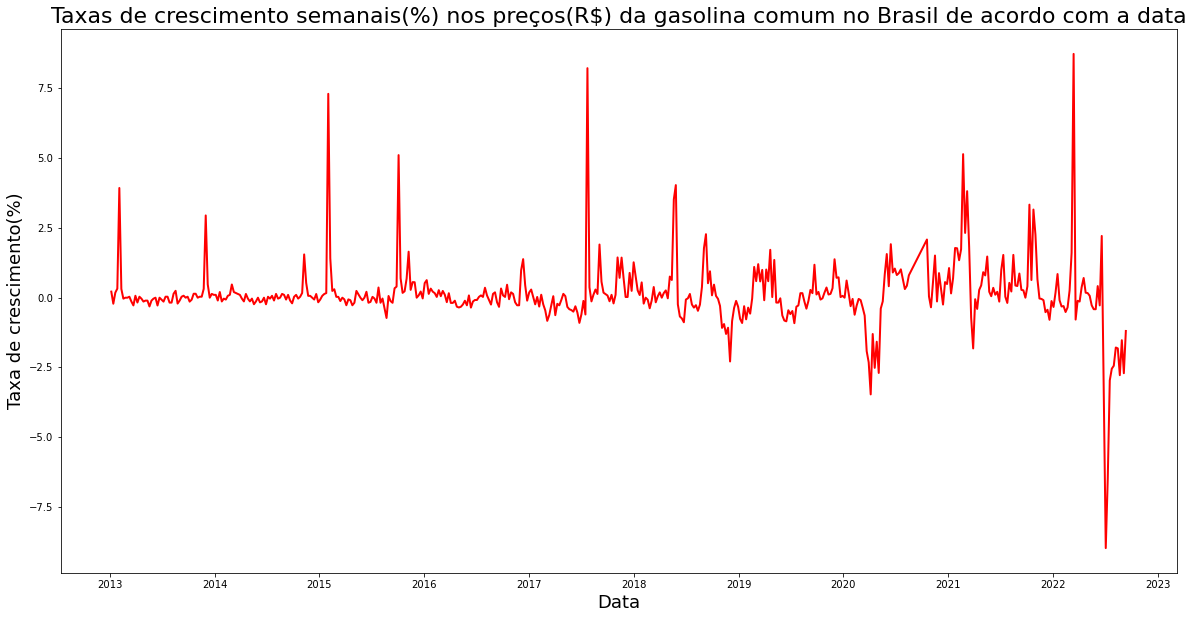

In [22]:
# Grafícos das taxas de crescimento semanais dos preços de cada combustível

plt.subplots(figsize=(20,10))

plt.plot(datas[1:], crescimento_gasolina, c='r', lw=2, label='Gasolina Comum')
plt.title('Taxas de crescimento semanais(%) nos preços(R$) da gasolina comum no Brasil de acordo com a data', 
          fontsize=22)
plt.xlabel('Data', fontsize=18)
plt.ylabel('Taxa de crescimento(%)', fontsize=18)
plt.show()

# **PREDIÇÕES**

In [23]:
pip install xgboost

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Preparação dos dados

In [25]:
# Adiciona ano e mês para utilizá-los na predição
gasolina_brasil.insert(1, 'mes', gasolina_brasil.data.apply(lambda x: x.month))
gasolina_brasil.insert(1, 'ano', gasolina_brasil.data.apply(lambda x: x.year))
gasolina_brasil

,data,ano,mes,produto,preco_medio_revenda,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda
0,2012-12-30,2012,12,GASOLINA COMUM,2.758,0.147,2.269,3.799
1,2013-01-06,2013,1,GASOLINA COMUM,2.764,0.146,2.269,3.799
2,2013-01-13,2013,1,GASOLINA COMUM,2.758,0.148,2.269,3.799
3,2013-01-20,2013,1,GASOLINA COMUM,2.763,0.146,2.269,3.799
4,2013-01-27,2013,1,GASOLINA COMUM,2.772,0.150,2.229,3.899
...,...,...,...,...,...,...,...,...
493,2022-08-14,2022,8,GASOLINA COMUM,5.400,0.327,4.500,8.750
494,2022-08-21,2022,8,GASOLINA COMUM,5.250,0.328,4.190,7.000
495,2022-08-28,2022,8,GASOLINA COMUM,5.170,0.335,4.130,7.000
496,2022-09-04,2022,9,GASOLINA COMUM,5.030,0.352,4.350,7.090


In [26]:
# x --> O que será usado para realizar a predição
# y --> O que será previsto

x = gasolina_brasil[['ano', 'mes']]
y = gasolina_brasil['preco_medio_revenda']

In [27]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y,
                                                        test_size=0.15,  # 15% para teste e 85% para treino
                                                        random_state=2)

## Criação e treinamento do modelo mais adequado

In [28]:
# Cria o modelo
xgbr= XGBRegressor()

# Treina o modelo
xgbr.fit(x_treino, y_treino)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [29]:
# Score
xgbr.score(x_teste,y_teste)

0.994841987209614

In [30]:
# Cria outro modelo para tentar melhorar eficácia
xgbr_2= XGBRegressor()

# Possíveis parâmetros a serem testados
parameters = {'objective': ['reg:linear'],
              'learning_rate': [.1, 0.2, .5, 0.01],
              'max_depth': [2, 3],
              'min_child_weight': [0.5, 1],
              'subsample': [0.5, 1],
              'colsample_bytree': [0.5, 1],
              'n_estimators': [100, 200, 300]}

xgb_grid = GridSearchCV(xgbr_2,
                        parameters,
                        cv=2,
                        n_jobs=5,
                        verbose=True)

xgb_grid.fit(x_treino,y_treino)

Fitting 2 folds for each of 192 candidates, totalling 384 fits
[12:31:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [31]:
# Exibe os melhores parâmetros
xgb_grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 0.5,
 'n_estimators': 300,
 'objective': 'reg:linear',
 'subsample': 1}

In [32]:
# Cria um modelo com os melhores parâmetros
xgbr_melhorado = XGBRegressor(colsample_bytree=1,
                              learning_rate=0.2,
                              max_depth=3,
                              min_child_weight=0.5,
                              n_estimators=300,
                              objective='reg:linear',
                              subsample=1)

# Treina o modelo
xgbr_melhorado.fit(x_treino, y_treino)

[12:31:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=0.5,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [33]:
predicao_melhorada = xgbr_melhorado.predict(x_teste)
predicao_xgbr = xgbr.predict(x_teste)

# Novo Score
xgbr_melhorado.score(x_teste,y_teste)

0.9943096653609567

## Métricas de desempenho

In [34]:
print(f'Erro Médio Absoluto (MAE): {mean_absolute_error(y_teste, predicao_melhorada)}')
print(f'Erro Quadrático Médio (MSE): {mean_squared_error(y_teste, predicao_melhorada)}')
print(f'Raiz do Erro Quadrático Médio (RMSE): {np.sqrt(mean_squared_error(y_teste, predicao_melhorada))}')
print(f'Coeficiente de determinação: {r2_score(y_teste, predicao_melhorada)}')

Erro Médio Absoluto (MAE): 0.045608786875406926
Erro Quadrático Médio (MSE): 0.007728384978338731
Raiz do Erro Quadrático Médio (RMSE): 0.08791123351619366
Coeficiente de determinação: 0.9943096653609567


## Testes e Predições

In [35]:
# Lista com tuplas para teste (datas que já existem)
teste = [(2022,7),(2022,8)]

# Lista com tuplas para predição
predicao = [(2022,9),(2022,10),(2022,11),(2022,12)]

# DataFrames para predição
df_teste = pd.DataFrame(teste, columns=['ano', 'mes'])
df_predicao = pd.DataFrame(predicao, columns=['ano', 'mes'])

testes = xgbr_melhorado.predict(df_teste)
julho_2022 = gasolina_brasil.loc[gasolina_brasil.ano == 2022].loc[gasolina_brasil.mes == 7]['preco_medio_revenda'].mean()
agosto_2022 = gasolina_brasil.loc[gasolina_brasil.ano == 2022].loc[gasolina_brasil.mes == 8]['preco_medio_revenda'].mean()



print(f'Teste de predição de preço para Julho/2022: {testes[0]:.5f}')
print(f'Preço médio real: {julho_2022}')
print(f'O algoritmo previu {round((testes[0] / julho_2022 if testes[0] < julho_2022 else julho_2022 / testes[0]) * 100, 2)}% do valor\n')

print(f'Teste de predição de preço para Agosto/2022: {testes[1]:.5f}')
print(f'Preço médio real: {agosto_2022}')
print(f'O algoritmo previu {round((testes[1] / agosto_2022 if testes[1] < agosto_2022 else agosto_2022 / testes[1]) * 100, 2)}% do valor')

Teste de predição de preço para Julho/2022: 5.96034
Preço médio real: 5.958
O algoritmo previu 99.96% do valor

Teste de predição de preço para Agosto/2022: 5.34718
Preço médio real: 5.33
O algoritmo previu 99.68% do valor


In [36]:
predicoes = xgbr_melhorado.predict(df_predicao)

print(f'As predições do preço médio de revenda da gasolina comum no Brasil para o restante do ano de 2022 são:\n')
print(f'Setembro/2022 --> {predicoes[0]:.5f}')
print(f'Outubro/2022 --> {predicoes[1]:.5f}')
print(f'Novembro/2022 --> {predicoes[2]:.5f}')
print(f'Dezembro/2022 --> {predicoes[3]:.5f}')

As predições do preço médio de revenda da gasolina comum no Brasil para o restante do ano de 2022 são:

Setembro/2022 --> 4.98403
Outubro/2022 --> 5.14553
Novembro/2022 --> 5.37352
Dezembro/2022 --> 5.31885


## Atualizações - Eficácia das predições

In [37]:
gasolina_atualizacao = pd.read_excel('dados/semanal-atualizado.xlsx')

In [38]:
gasolina_atualizacao.insert(1, 'mes', gasolina_atualizacao['DATA INICIAL'].apply(lambda x: x.month))
gasolina_atualizacao.insert(1, 'ano', gasolina_atualizacao['DATA INICIAL'].apply(lambda x: x.year))

setembro_2022 = gasolina_atualizacao.loc[gasolina_atualizacao['PRODUTO'] == 'GASOLINA COMUM'] \
    .loc[gasolina_atualizacao.ano == 2022].loc[gasolina_atualizacao.mes == 9]['PREÇO MÉDIO REVENDA'].mean()

outubro_2022 = gasolina_atualizacao.loc[gasolina_atualizacao['PRODUTO'] == 'GASOLINA COMUM'] \
    .loc[gasolina_atualizacao.ano == 2022].loc[gasolina_atualizacao.mes == 10]['PREÇO MÉDIO REVENDA'].mean()

novembro_2022 = gasolina_atualizacao.loc[gasolina_atualizacao['PRODUTO'] == 'GASOLINA COMUM'] \
    .loc[gasolina_atualizacao.ano == 2022].loc[gasolina_atualizacao.mes == 11]['PREÇO MÉDIO REVENDA'].mean()

dezembro_2022 = gasolina_atualizacao.loc[gasolina_atualizacao['PRODUTO'] == 'GASOLINA COMUM'] \
    .loc[gasolina_atualizacao.ano == 2022].loc[gasolina_atualizacao.mes == 12]['PREÇO MÉDIO REVENDA'].mean()

print(f'Predição de preço para Setembro/2022: {predicoes[0]:.5f}')
print(f'Preço médio real: {setembro_2022:.5f}')
print(f'O algoritmo previu {round((predicoes[0] / setembro_2022 if predicoes[0] < setembro_2022 else setembro_2022 / predicoes[0]) * 100, 2)}% do valor')

print(f'\nPredição de preço para Outubro/2022: {predicoes[1]:.5f}')
print(f'Preço médio real: {outubro_2022:.5f}')
print(f'O algoritmo previu {round((predicoes[1] / outubro_2022 if predicoes[1] < outubro_2022 else outubro_2022 / predicoes[1]) * 100, 2)}% do valor')

print(f'\nPredição de preço para Novembro/2022: {predicoes[2]:.5f}')
print(f'Preço médio real: {novembro_2022:.5f}')
print(f'O algoritmo previu {round((predicoes[2] / novembro_2022 if predicoes[2] < novembro_2022 else novembro_2022 / predicoes[2]) * 100, 2)}% do valor')

print(f'\nPredição de preço para Dezembro/2022: {predicoes[3]:.5f}')
print(f'Preço médio real: {dezembro_2022:.5f}')
print(f'O algoritmo previu {round((predicoes[3] / dezembro_2022 if predicoes[3] < dezembro_2022 else dezembro_2022 / predicoes[3]) * 100, 2)}% do valor')

Predição de preço para Setembro/2022: 4.98403
Preço médio real: 4.92250
O algoritmo previu 98.77% do valor

Predição de preço para Outubro/2022: 5.14553
Preço médio real: 4.88400
O algoritmo previu 94.92% do valor

Predição de preço para Novembro/2022: 5.37352
Preço médio real: 5.03500
O algoritmo previu 93.7% do valor

Predição de preço para Dezembro/2022: 5.31885
Preço médio real: 4.96000
O algoritmo previu 93.25% do valor


## Conclusão

A predição foi precisa para Setembro/2022, porém perdeu gradativamente a eficácia nos meses seguintes.